# 风险分析
## 错误尝试

In [1]:
#-*- coding:utf-8 -*-
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

In [2]:
c_data = pd.read_csv('completed.csv', encoding = 'utf_8_sig')
f_data = pd.read_csv('failed.csv', encoding='utf_8_sig')
heads = ['Country','Ownership Type','Financing Source','Owners','Developers',
         'Consultants','Contractors','Shareholders']
data1 = c_data[heads]
data0 = f_data[heads]
data = pd.concat([data1, data0])

In [8]:
# 把data的每一行转换为一个行向量
X_str = []
for i in range(324):
    a = [x for x in data.iloc[i][:]]
    X_str.append(a)
X = []
for x in X_str:
    xline = []
    xline = [i for i in x[0:2]]
    for index in range(2,8):
        a = [float(i) for i in x[index].strip('[]').split(',')]
        for i in a:
            xline.append(i)
    X.append(xline)
    
Y = []
for line in pd.concat([c_data[u'Project Status'], f_data[u'Project Status']]):
    Y.append(line)

In [9]:
# 确保无缺失值，如果有，找到他
print(np.isnan(X).any())
for i in range(324):
    if np.isnan(X[i]).any():
        print(i,X[i])
X[80][0] = 6
print(np.isnan(X).any())

True
80 [nan, 1, 2.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
False


In [15]:
X = np.array(X)
Y = np.array(Y)
print(X.shape,Y.shape)
x_smote_resampled, y_smote_resampled = model_smote.fit_sample(X,Y)
print(x_smote_resampled.shape)
print(y_smote_resampled)
print(y_smote_resampled.shape)

(324, 21) (324,)
(612, 21)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### 10折交叉验证

In [54]:
from sklearn.model_selection import KFold
KF = KFold(n_splits = 10)
for train_index, test_index in KF.split(x_smote_resampled):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train,X_test=x_smote_resampled[train_index],x_smote_resampled[test_index]
    Y_train,Y_test=y_smote_resampled[train_index],y_smote_resampled[test_index]
#     print(X_train,X_test)
    print(Y_train,Y_test)

TRAIN: [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306

## 尝试
[参考](https://www.cnblogs.com/SUNYZBlog/p/9695399.html)

### X的很多列是字符串，拆分成多列
[应用lambda](https://blog.csdn.net/Asher117/article/details/84346073)

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv', encoding='utf_8_sig')
Y = df.label
head = ['Financing Source','Owners','Developers','Consultants','Contractors','Shareholders']
heads = ['Country', 'Ownership Type', 'Financing Source-4']
for h in head:
    for i in range(1,4):
        heads.append(h+'-'+str(i))

In [13]:
X = df[heads]
# print(np.isnan(X).any())

### 随机森林简单试用

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=33)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20,random_state=33)
clf = clf.fit(X_train,Y_train)

print('输入的大小:{},输出的大小：{} \n准确率为：{:.2f}'.format(str(X.shape),str(Y.shape),clf.score(X_test,Y_test)))

输入的大小:(324, 21),输出的大小：(324,) 
准确率为：0.95


### SMOTE 生成负样本

In [133]:
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.over_sampling import SMOTE
model_smote =SMOTEENN()
print(X.shape,Y.shape)
x_smote_resampled, y_smote_resampled = model_smote.fit_sample(X,Y)
print(x_smote_resampled.shape,y_smote_resampled.shape)
# print(y_smote_resampled)

(324, 21) (324,)
(556, 21) (556,)


In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote_resampled, y_smote_resampled, test_size=0.25, random_state=33)
print('输入的大小:{},输出的大小：{}'.format(str(x_smote_resampled.shape),str(y_smote_resampled.shape)))
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20,random_state=33)
clf = clf.fit(X_train,y_train)
print("准确率为：{:.2f}".format(clf.score(X_test,y_test)))

输入的大小:(556, 21),输出的大小：(556,)
准确率为：0.99


In [135]:
clf.feature_importances_

array([2.77456833e-01, 3.68341634e-02, 2.56278472e-02, 2.42924022e-01,
       6.54195362e-02, 4.14454646e-02, 9.94751030e-03, 4.36192865e-02,
       3.76802465e-02, 1.16726535e-02, 1.16156034e-04, 3.81999875e-03,
       2.22778525e-02, 4.39129206e-02, 4.14253081e-02, 2.50132528e-02,
       2.02371441e-02, 1.11472962e-02, 2.27841575e-02, 5.92443371e-03,
       1.07139167e-02])

In [136]:
import matplotlib.pyplot as plt
from pylab import *
# 图表汉字正常显示
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 图表负值正常显示
matplotlib.rcParams['axes.unicode_minus'] = False

### 生成样本转化为DataFrame

In [137]:
x = pd.DataFrame(x_smote_resampled)
x.columns = heads
print(x.shape)
y = pd.DataFrame(y_smote_resampled)
y.columns = ['label']
print(y.shape)

(556, 21)
(556, 1)


### 不同特征的项目完成情况分布图

In [138]:
fig = plt.figure()
fig.set(alpha=0.2)

for h in heads:
    comp = df['{}'.format(h)][df.label == 1].value_counts()
    f = df['{}'.format(h)][df.label == 0].value_counts()
    D = pd.DataFrame({'completed':comp,'failed':f})
#     D.plot(kind='bar', stacked=True)
#     plt.title(u'项目完成情况')
#     plt.xlabel(u'{}'.format(h))
#     plt.ylabel(u'项目数量')
#     # plt.show()
#     save_path = 'E:\Deecamp\风险分析\images\{}.png'.format(h)
#     plt.savefig(save_path,bbox_inches='tight')    

<Figure size 432x288 with 0 Axes>

### 计算每个特征的重要程度
对于每个特征，随机添加一些噪音值，通过对于结果的影响来判断相应的重要程度。如果一个属性添加了很多噪音但对结果的准确率没有太大影响，就认为其重要程度相对较低。
#### 原始数据的结果

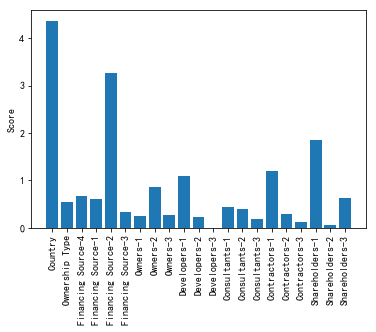

In [139]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
selector.fit(X[heads], df['label'])
# 选出前k个分值最大的特征
X_new = selector.fit_transform(X[heads], df['label'])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(heads)),scores)
plt.xticks(range(len(heads)),heads, rotation='vertical')
plt.ylabel('Score')
path = 'E:\Deecamp\风险分析\images\Select.png'
plt.savefig(path,bbox_inches='tight')    

#### k个分值最大的特征

In [140]:
# 给特征按分值排序
attri = {}
for i in range(len(scores)):
    attri['{}'.format(heads[i])] = scores[i]
sort_attri = sorted(attri.items(), key = lambda x:x[1], reverse=True)
new_head = [h[0] for h in sort_attri[:10]]
print(new_head)
# 留前十个特征
x_new = pd.DataFrame(X_new)
x_new.shape

['Country', 'Financing Source-2', 'Shareholders-1', 'Contractors-1', 'Developers-1', 'Owners-2', 'Financing Source-4', 'Shareholders-3', 'Financing Source-1', 'Ownership Type']


(324, 10)

#### 用增广后的数据

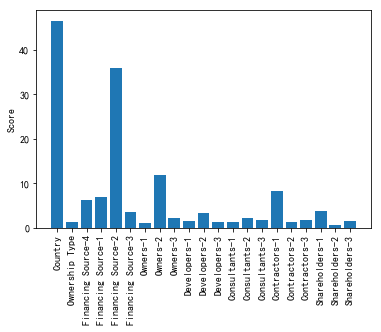

In [141]:
selector = SelectKBest(f_classif, k=21)
selector.fit(x[heads], y['label'])
XS_new = selector.fit_transform(x, y.label)
score = -np.log10(selector.pvalues_)
plt.bar(range(len(heads)),score)
plt.xticks(range(len(heads)),heads, rotation='vertical')
plt.ylabel('Score')
path = 'E:\Deecamp\风险分析\images\SMOTE_Select.png'
plt.savefig(path,bbox_inches='tight') 

In [142]:
Smote_attri = {}
for i in range(len(score)):
    Smote_attri['{}'.format(heads[i])] = score[i]
sort_Smoteattri = sorted(Smote_attri.items(), key = lambda x:x[1], reverse=True)

In [143]:
xs_new = pd.DataFrame(XS_new)
print(xs_new.shape)
newS_head = [h[0] for h in sort_Smoteattri[:10]]
print(newS_head)
print(new_head)
print(y.shape)

(556, 21)
['Country', 'Financing Source-2', 'Owners-2', 'Contractors-1', 'Financing Source-1', 'Financing Source-4', 'Shareholders-1', 'Financing Source-3', 'Developers-2', 'Consultants-2']
['Country', 'Financing Source-2', 'Shareholders-1', 'Contractors-1', 'Developers-1', 'Owners-2', 'Financing Source-4', 'Shareholders-3', 'Financing Source-1', 'Ownership Type']
(556, 1)


### 线性回归+k折交叉验证

In [144]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold,cross_val_score

alg = LinearRegression()
kf = KFold(n_splits = 2)
predictions = []
for train, test in kf.split(X):
    x_train = X.iloc[train, :]
    y_train = Y.iloc[train]
    alg.fit(x_train, y_train)
    test_pre = alg.predict(X.iloc[test,:])
    predictions.append(test_pre)
    
predictions = np.concatenate(predictions, axis=0)

predictions[predictions > 0.5] =1
predictions[predictions <=0.5] = 0
accuracy = sum(predictions == Y)/len(predictions)

print(accuracy)

0.9444444444444444


#### 原始数据

(324, 21) (324,)


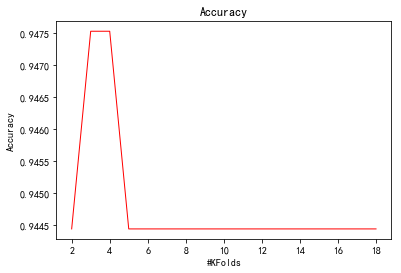

In [145]:
N = [i for i in range(2,19)]
A = []
for n in N:
    kf = KFold(n_splits = n)
    predictions = []
    for train, test in kf.split(X):
        x_train = X.iloc[train, :]
        y_train = Y.iloc[train]
        alg.fit(x_train, y_train)
        test_pre = alg.predict(X.iloc[test,:])
        predictions.append(test_pre)

    predictions = np.concatenate(predictions, axis=0)

    predictions[predictions > 0.5] =1
    predictions[predictions <=0.5] = 0
    accuracy = sum(predictions == Y)/len(predictions)

    A.append(accuracy)
    
plt.plot(N,A,color='red',linewidth = 1)
plt.title('Accuracy')
plt.xlabel('#KFolds')
plt.ylabel('Accuracy')
path = 'E:\Deecamp\风险分析\images\Kfold_A_linear.png'
plt.savefig(path,bbox_inches='tight')
print(X.shape,Y.shape)

#### 增广后数据

(556, 21) (556, 1)


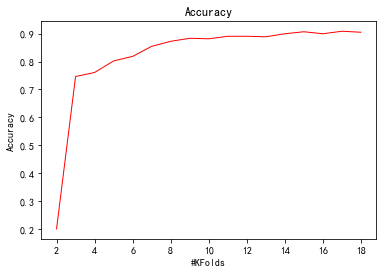

In [146]:
N = [i for i in range(2,19)]
A = []
for n in N:
    kf = KFold(n_splits = n)
    predictions = []
    for train, test in kf.split(x):
        x_train = x.iloc[train, :]
        y_train = y.iloc[train]
        alg.fit(x_train, y_train)
        test_pre = alg.predict(xs_new.iloc[test,:])
        predictions.append(test_pre)

    predictions = np.concatenate(predictions, axis=0)

    predictions[predictions > 0.5] =1
    predictions[predictions <=0.5] = 0
    accuracy = sum(predictions == y)/len(predictions)

    A.append(accuracy)
    
plt.plot(N,A,color='red',linewidth = 1)
plt.title('Accuracy')
plt.xlabel('#KFolds')
plt.ylabel('Accuracy')
path = 'E:\Deecamp\风险分析\images\Kfold_S_linear.png'
plt.savefig(path,bbox_inches='tight')
print(x.shape,y.shape)

### 逻辑回归+k折交叉验证
#### 原始数据

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

0.9507440476190476


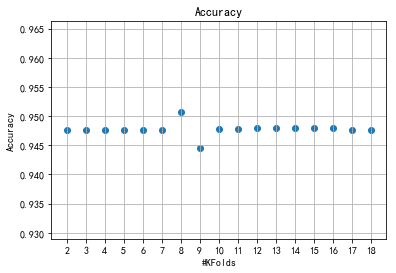

In [220]:
N = [i for i in range(2,19)]
A = []
for n in N:
    lg = LogisticRegression(random_state=1)
    Score = cross_val_score(lg, X, Y, cv=n)
    A.append(Score.mean())
    
plt.scatter(N,A)
plt.grid()
plt.xticks(N)
plt.title('Accuracy')
plt.xlabel('#KFolds')
plt.ylabel('Accuracy')
path = 'E:\Deecamp\风险分析\images\Kfold_A_logistic.png'
plt.savefig(path,bbox_inches='tight')
print(max(A))

#### 增广后数据

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chan

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was pa

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chan

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was pa

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chan

F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was pa

0.9245764441722801


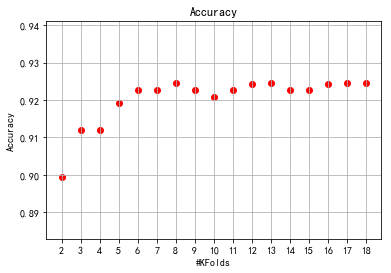

In [219]:
N = [i for i in range(2,19)]
A = []
for n in N:
    lg = LogisticRegression(random_state=1)
    Score = cross_val_score(lg, x, y, cv=n)
    A.append(Score.mean())
    
plt.scatter(N,A,color = 'red')
plt.grid()
plt.xticks(N)
plt.title('Accuracy')
plt.xlabel('#KFolds')
plt.ylabel('Accuracy')
path = 'E:\Deecamp\风险分析\images\Kfold_S_logistic.png'
plt.savefig(path,bbox_inches='tight')
print(max(A))

### 特征个数的影响
#### 原始数据

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

0.9508928571428571


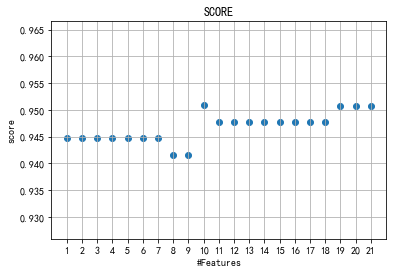

In [177]:
K = [k for k in range(1,22)]
S = []
for i in K:
    selector = SelectKBest(f_classif, k=i)
    X_new = selector.fit_transform(X, Y)
    x_new = pd.DataFrame(X_new)
    alg = LogisticRegression(random_state=1)
    Score = cross_val_score(alg, x_new, Y, cv=8)
    S.append(Score.mean())

plt.scatter(K,S)
plt.grid()
plt.xticks(K)
plt.title('SCORE')
plt.xlabel('#Features')
plt.ylabel('score')
path = 'E:\Deecamp\风险分析\images\kfeature_Score1.png'
plt.savefig(path,bbox_inches='tight')
print(max(S))

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklea

0.9245764441722801


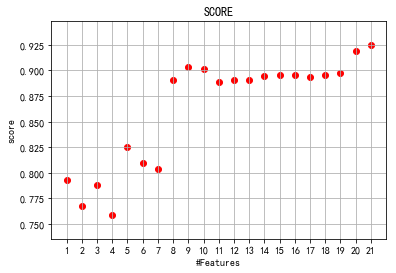

In [175]:
K = [k for k in range(1,22)]
S = []
for i in K:
    selector = SelectKBest(f_classif, k=i)
    XS_new = selector.fit_transform(x, ravel(y))
    xs_new = pd.DataFrame(XS_new)
    alg = LogisticRegression(random_state=33)
    Score = cross_val_score(alg, xs_new, ravel(y), cv=8)
    S.append(Score.mean())

plt.scatter(K,S,color = 'red')
plt.grid()
plt.xticks(K)
plt.title('SCORE')
plt.xlabel('#Features')
plt.ylabel('score')
path = 'E:\Deecamp\风险分析\images\kfeature_S_Score.png'
plt.savefig(path,bbox_inches='tight')
print(max(S))

### 随机森林

0.9629944767875801


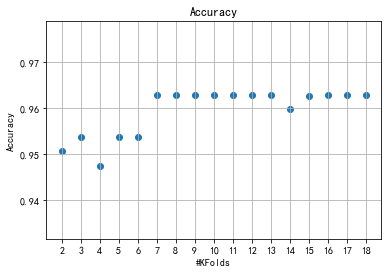

In [224]:
N = [i for i in range(2,19)]
A = []
for n in N:
    alg = RandomForestClassifier(random_state=1, n_estimators=20,min_samples_leaf=2)
    Score = cross_val_score(alg, X, Y, cv=n)
    A.append(Score.mean())
    
plt.scatter(N,A)
plt.grid()
plt.xticks(N)
plt.title('Accuracy')
plt.xlabel('#KFolds')
plt.ylabel('Accuracy')
path = 'E:\Deecamp\风险分析\images\Kfold_A_RF.png'
plt.savefig(path,bbox_inches='tight')
print(max(A))

0.9893855888956931


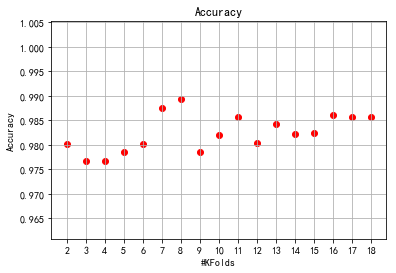

In [223]:
N = [i for i in range(2,19)]
A = []
for n in N:
    alg = RandomForestClassifier(random_state=1, n_estimators=20,min_samples_leaf=2)
    Score = cross_val_score(alg, x, ravel(y), cv=n)
    A.append(Score.mean())
    
plt.scatter(N,A,color = 'red')
plt.grid()
plt.xticks(N)
plt.title('Accuracy')
plt.xlabel('#KFolds')
plt.ylabel('Accuracy')
path = 'E:\Deecamp\风险分析\images\Kfold_S_RF.png'
plt.savefig(path,bbox_inches='tight')
print(max(A))

0.965892838788306


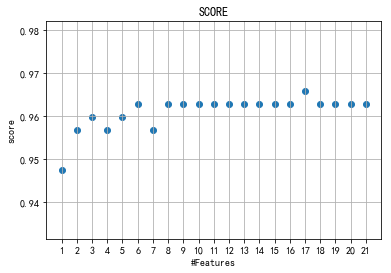

In [225]:
K = [k for k in range(1,22)]
S = []
for i in K:
    selector = SelectKBest(f_classif, k=i)
    X_new = selector.fit_transform(X, Y)
    x_new = pd.DataFrame(X_new)
    alg = RandomForestClassifier(random_state=1, n_estimators=20,min_samples_leaf=2)
    sco = cross_val_score(alg,x_new, Y,cv = 7 )
    S.append(sco.mean())

plt.scatter(K,S)
plt.title('SCORE')
plt.grid()
plt.xticks(K)
plt.xlabel('#Features')
plt.ylabel('score')
path = 'E:\Deecamp\风险分析\images\Score_RF.png'
plt.savefig(path,bbox_inches='tight')
print(max(S))

In [232]:
def num_tree(n):
    K = [k for k in range(1,22)]
    S = []
    for i in K:
        selector = SelectKBest(f_classif, k=i)
        XS_new = selector.fit_transform(x, ravel(y))
        xs_new = pd.DataFrame(XS_new)
        alg = RandomForestClassifier(random_state=1, n_estimators=n,min_samples_leaf=2)
        sco = cross_val_score(alg,xs_new, ravel(y),cv = 8 )
        S.append(sco.mean())

#     plt.scatter(K,S,color = 'red')
#     plt.grid()
#     plt.title('SCORE')
#     plt.xlabel('#Features')
#     plt.ylabel('score')
#     plt.xticks(K)
#     path = 'E:\Deecamp\风险分析\images\Score_RF_{}.png'.format(str(n))
#     plt.savefig(path,bbox_inches='tight')
#     print(max(S))
    return(max(S))

0.9893855888956931


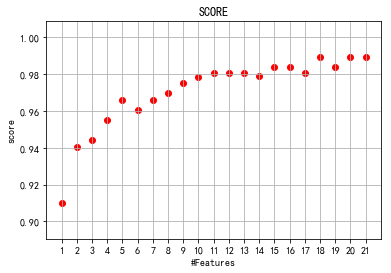

In [236]:
A = []
N = [i for i in range(10,200,10)]
for j in N:
    A.append(num_tree(j))

plt.plot(N,A,'o',N,S,'-')
plt.grid()
    

0.9876760563380282


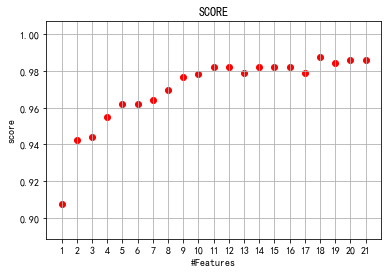

In [237]:
num_tree(30)

0.9894366197183099


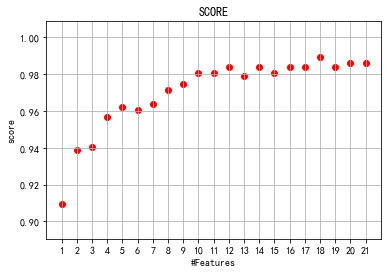

In [238]:
num_tree(40)

0.9876250255154113


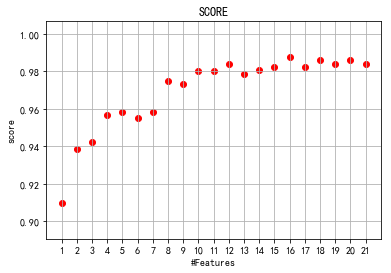

In [239]:
num_tree(50)

0.9876250255154113


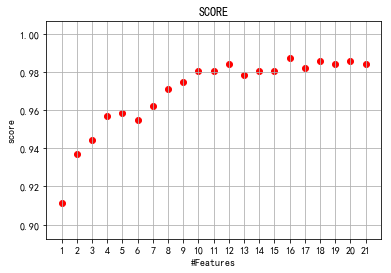

In [240]:
num_tree(60)

0.9876250255154113


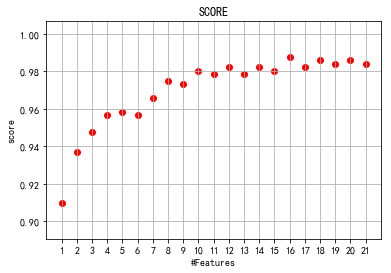

In [241]:
num_tree(70)

0.9893855888956931


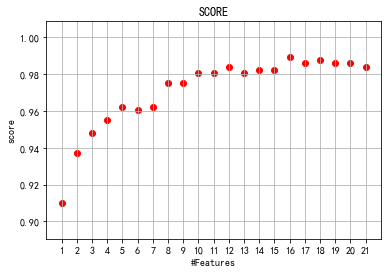

In [242]:
num_tree(80)

0.9911971830985915


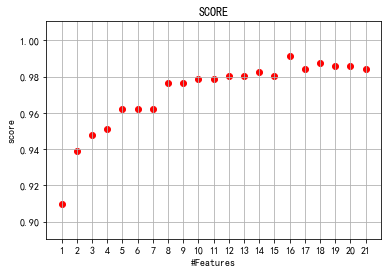

In [243]:
num_tree(90)

0.9893855888956931


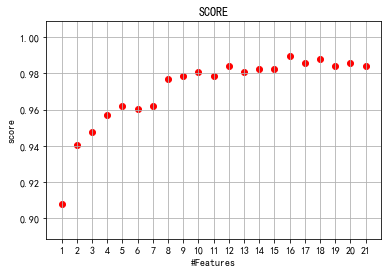

In [244]:
num_tree(100)

0.9894366197183099


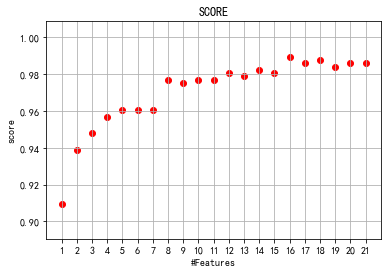

In [245]:
num_tree(110)

0.9894366197183099


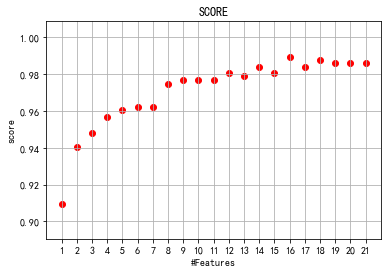

In [246]:
num_tree(120)